Link Repositorio: https://github.com/Harry-GNS/Tarea08-Ejercicios-Unidad-03C-minimos-cuadrados

### Ejercicio 1

**Datos:**

| xi   | 4.0   | 4.2   | 4.5   | 4.7   | 5.1   | 5.5   | 5.9   | 6.3   | 6.8   | 7.1   |
|------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| yi   | 102.56| 130.11| 113.18| 142.05| 167.53| 195.14| 224.87| 256.73| 299.50| 326.72|

**Instrucciones:**

a. Construya el polinomio por mínimos cuadrados de grado 1 y calcule el error.  
b. Construya el polinomio por mínimos cuadrados de grado 2 y calcule el error.  
c. Construya el polinomio por mínimos cuadrados de grado 3 y calcule el error.  
d. Construya el modelo por mínimos cuadrados de la forma \( y = b x^a \) y calcule el error.  
e. Construya el modelo por mínimos cuadrados de la forma \( y = b^x \) y calcule el error.  

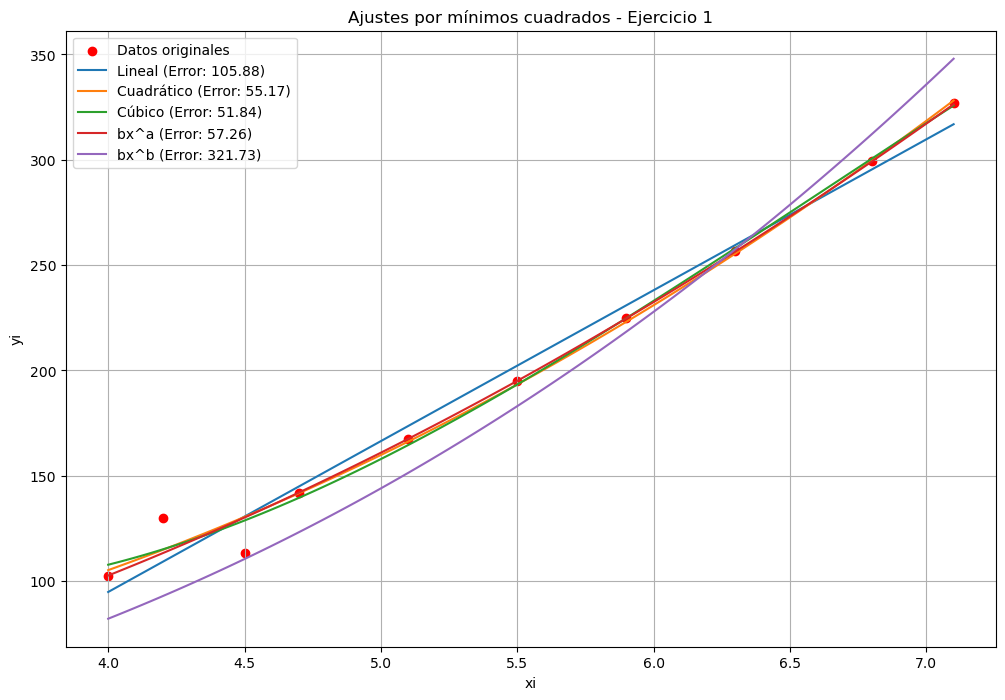

a. Polinomio grado 1:  
71.61 x - 191.6 Error: 105.88388862638897
b. Polinomio grado 2:        2
8.217 x - 19.31 x + 51 Error: 55.165620011702345
c. Polinomio grado 3:         3         2
-2.607 x + 51.56 x - 254.9 x + 469.2 Error: 51.838306474030176
d. Modelo bx^a: b = 6.283966084740469 a = 2.015190342585292 Error: 57.25817542056742
e. Modelo bx^b: b = 2.5150557664079805 Error: 321.73280256277945


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos del ejercicio 1
xi = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1])
yi = np.array([102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72])

# Función para calcular el error cuadrático medio
def calcular_error(y_real, y_pred):
    return np.mean((y_real - y_pred)**2)

# a. Ajuste lineal (grado 1)
coef1 = np.polyfit(xi, yi, 1)
p1 = np.poly1d(coef1)
y_pred1 = p1(xi)
error1 = calcular_error(yi, y_pred1)

# b. Ajuste cuadrático (grado 2)
coef2 = np.polyfit(xi, yi, 2)
p2 = np.poly1d(coef2)
y_pred2 = p2(xi)
error2 = calcular_error(yi, y_pred2)

# c. Ajuste cúbico (grado 3)
coef3 = np.polyfit(xi, yi, 3)
p3 = np.poly1d(coef3)
y_pred3 = p3(xi)
error3 = calcular_error(yi, y_pred3)

# d. Ajuste de la forma bx^a
def modelo_d(x, b, a):
    return b * x**a
params_d, _ = curve_fit(modelo_d, xi, yi, p0=[1, 1])
y_pred_d = modelo_d(xi, *params_d)
error_d = calcular_error(yi, y_pred_d)

# e. Ajuste de la forma bx^b (asumo que es bx^a con a=b)
def modelo_e(x, b):
    return b * x**b
params_e, _ = curve_fit(modelo_e, xi, yi, p0=[1])
y_pred_e = modelo_e(xi, *params_e)
error_e = calcular_error(yi, y_pred_e)

# Graficar todos los ajutses 
plt.figure(figsize=(12, 8))
plt.scatter(xi, yi, color='red', label='Datos originales')

x_vals = np.linspace(min(xi), max(xi), 100)
plt.plot(x_vals, p1(x_vals), label=f'Lineal (Error: {error1:.2f})')
plt.plot(x_vals, p2(x_vals), label=f'Cuadrático (Error: {error2:.2f})')
plt.plot(x_vals, p3(x_vals), label=f'Cúbico (Error: {error3:.2f})')
plt.plot(x_vals, modelo_d(x_vals, *params_d), label=f'bx^a (Error: {error_d:.2f})')
plt.plot(x_vals, modelo_e(x_vals, *params_e), label=f'bx^b (Error: {error_e:.2f})')

plt.title('Ajustes por mínimos cuadrados - Ejercicio 1')
plt.xlabel('xi')
plt.ylabel('yi')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar ecuaciones y errores
print("a. Polinomio grado 1:", p1, "Error:", error1)
print("b. Polinomio grado 2:", p2, "Error:", error2)
print("c. Polinomio grado 3:", p3, "Error:", error3)
print("d. Modelo bx^a: b =", params_d[0], "a =", params_d[1], "Error:", error_d)
print("e. Modelo bx^b: b =", params_e[0], "Error:", error_e)